### Import necessary libraries

In [57]:
import numpy as np
if not hasattr(np, 'bool'):
	np.bool = bool
if not hasattr(np, 'int'):
	np.int = int
import pandas as pd
import matplotlib.pyplot as plt
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

### Load Dataset

In [58]:
# Load Dataset into a DataFrame
df = pd.read_csv('compas-scores-two-years.csv')
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


### Data Preprocessing

In [59]:
df.isna().sum().sort_values(ascending=False)

violent_recid              7214
vr_charge_degree           6395
vr_case_number             6395
vr_offense_date            6395
vr_charge_desc             6395
c_arrest_date              6077
r_jail_out                 4898
r_jail_in                  4898
r_days_from_arrest         4898
r_charge_desc              3801
r_offense_date             3743
r_case_number              3743
r_charge_degree            3743
c_offense_date             1159
c_jail_out                  307
days_b_screening_arrest     307
c_jail_in                   307
out_custody                 236
in_custody                  236
c_charge_desc                29
c_days_from_compas           22
c_case_number                22
v_type_of_assessment          0
type_of_assessment            0
decile_score.1                0
v_decile_score                0
v_score_text                  0
v_screening_date              0
screening_date                0
priors_count.1                0
start                         0
end     

In [60]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [71]:
selected_columns = [
    'id', 'age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex',
    'priors_count', 'days_b_screening_arrest', 'decile_score', 'is_recid',
    'two_year_recid', 'c_jail_in', 'c_jail_out'
]
df = df[selected_columns]
df.head()

,id,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,1,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,3,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,4,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
3,5,23,F,African-American,Less than 25,High,Male,1,NaN,8,0,0,NaN,NaN
4,6,43,F,Other,25 - 45,Low,Male,2,NaN,1,0,0,NaN,NaN


In [72]:
df.dropna(inplace=True)

C:\Users\Brian\AppData\Local\Temp\ipykernel_12040\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [73]:
df.isna().sum().sort_values(ascending=False)

id                         0
age                        0
c_charge_degree            0
race                       0
age_cat                    0
score_text                 0
sex                        0
priors_count               0
days_b_screening_arrest    0
decile_score               0
is_recid                   0
two_year_recid             0
c_jail_in                  0
c_jail_out                 0
dtype: int64

In [74]:
# Filter to relevant racial groups
df = df[df['race'].isin(['African-American', 'Caucasian'])]
df['race_binary'] = df['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [75]:
# Binarize COMPAS scores (high-risk: score >=7)
df['predicted_high_risk'] = df['decile_score'].apply(lambda x: 1 if x >= 7 else 0)

In [76]:
# Prepare dataset for AIF360
privileged_groups = [{'race_binary': 1}]  # Caucasian
unprivileged_groups = [{'race_binary': 0}]  # African-American

In [78]:
# Select only numerical columns and required columns for BinaryLabelDataset
numerical_cols = [
    'age', 'priors_count', 'days_b_screening_arrest', 'decile_score',
    'is_recid', 'two_year_recid', 'race_binary', 'predicted_high_risk'
]
df_numeric = df[numerical_cols]

# Create ground truth dataset
dataset_gt = BinaryLabelDataset(
    df=df_numeric,
    label_names=['two_year_recid'],
    protected_attribute_names=['race_binary'],
    favorable_label=0,
    unfavorable_label=1
)

In [79]:
# Create prediction dataset
dataset_pred = dataset_gt.copy()
dataset_pred.labels = df['predicted_high_risk'].values.reshape(-1, 1)

In [80]:
# Compute metrics
metric = ClassificationMetric(
    dataset_gt,
    dataset_pred,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

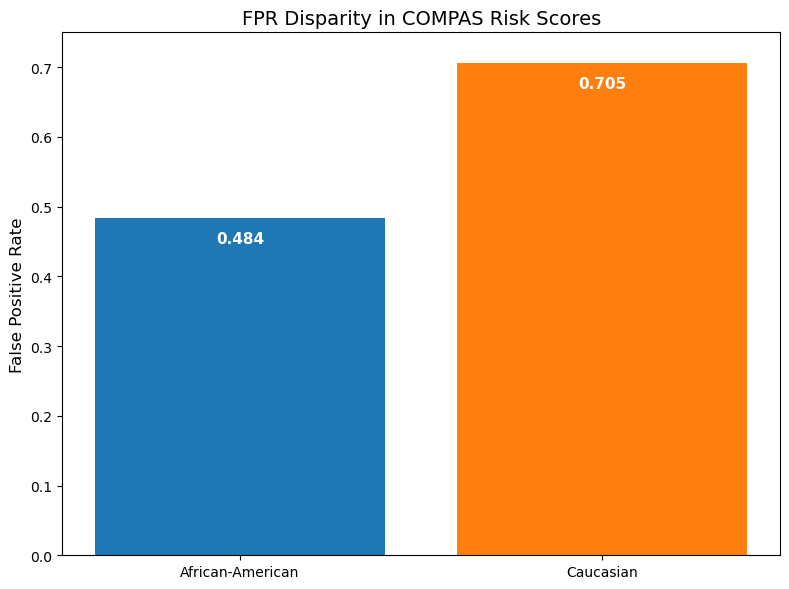


Fairness Metrics Summary:
False Positive Rate Difference: -0.221
Average Odds Difference: -0.184
Disparate Impact Ratio: 0.744
Statistical Parity Difference: -0.212


In [84]:
# Generate visualization
def plot_fairness_metrics(metric):
    fig, ax = plt.subplots(figsize=(8, 6))
    groups = ['African-American', 'Caucasian']
    fpr = [metric.false_positive_rate(privileged=False), 
           metric.false_positive_rate(privileged=True)]
    
    bars = ax.bar(groups, fpr, color=['#1f77b4', '#ff7f0e'])
    ax.set_ylabel('False Positive Rate', fontsize=12)
    ax.set_title('FPR Disparity in COMPAS Risk Scores', fontsize=14)
    ax.set_ylim(0, 0.75)
    
    # Add value labels inside the bars
    for bar, v in zip(bars, fpr):
        ax.text(bar.get_x() + bar.get_width() / 2, v - 0.04, f"{v:.3f}", ha='center', va='bottom', color='white', fontsize=11, fontweight='bold')
        
    plt.tight_layout()
    plt.savefig('compas_fpr_disparity.png', bbox_inches='tight')
    plt.show()

plot_fairness_metrics(metric)

# Print key metrics
print("\n" + "="*50)
print("Fairness Metrics Summary:")
print(f"False Positive Rate Difference: {metric.false_positive_rate_difference():.3f}")
print(f"Average Odds Difference: {metric.average_odds_difference():.3f}")
print(f"Disparate Impact Ratio: {metric.disparate_impact():.3f}")
print(f"Statistical Parity Difference: {metric.statistical_parity_difference():.3f}")
print("="*50)